In [19]:
#@title Copyright 2023 Google LLC. Double-click for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Numerical data: Statistics on a dataset

This Colab programming exercise (first of two) is part of the Machine Learning Crash Course module [Working with numerical data](https://developers.google.com/machine-learning/crash-course/numerical-data).

## What to expect

In the section, [First steps with numerical data](https://developers.google.com/machine-learning/crash-course/numerical-data/first-steps), you learned how to do the following:
- Visualize your data in plots or graphs.
- Evaluate potential features and labels mathematically.
- Find [**outliers**](https://developers.google.com/machine-learning/glossary/#outliers) in the dataset.

This exercise takes you through the process of finding columns that contain blatant outliers, which you can then decide to keep in or delete from the dataset.

In [20]:
# @title Setup - Install relevant modules

!pip install pandas

In [21]:
# @title Setup - Import relevant modules

# The following code imports relevant modules that
# allow you to run the colab.
# If you encounter technical issues running some of the code sections
# that follow, try running this section again.

import pandas as pd

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [22]:
#@title Import the dataset

# The following code imports the dataset that is used in the colab.

training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

## Get basic statistics

In the following code section, the DataFrame `describe` method returns basic statistics on all the columns in the dataset, such as:

* `count` is the number of populated elements in this column. Ideally, every column contains the same value for `count`, but that's not always the case.
* `mean` is the traditional average of values in that column. We recommend comparing the `mean` to the median for each column. The **median** is the 50% row of the table.
* `std` is the standard deviation of the values in this column.
* `min`, `25%`, `50%`, `75%`, and `max` indicate values in the 0, 25, 50, 75, and 100th percentiles.

In [23]:
# Get statistics on the dataset.

# The following code returns basic statistics about the data in the dataframe.

training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


### Task: Identify possible outliers

Based on the preceding statisics, do you see any columns that might contain outliers?

In [24]:
# @title Solution (run this code block to view) { display-mode: "form" }

print("""The following columns might contain outliers:

  * total_rooms
  * total_bedrooms
  * population
  * households
  * possibly, median_income

In all of those columns:

  * the standard deviation is almost as high as the mean
  * the delta between 75% and max is much higher than the
      delta between min and 25%.""")

The following columns might contain outliers:

  * total_rooms
  * total_bedrooms
  * population
  * households
  * possibly, median_income

In all of those columns:

  * the standard deviation is almost as high as the mean
  * the delta between 75% and max is much higher than the
      delta between min and 25%.


My Additions 

count   17000.0
mean     1429.6
std      1147.9
min         3.0
25%       790.0
50%      1167.0
75%      1721.0
max     35682.0
Name: population, dtype: float64

Mean vs Median:
Mean: 1429.6
Median: 1167.0


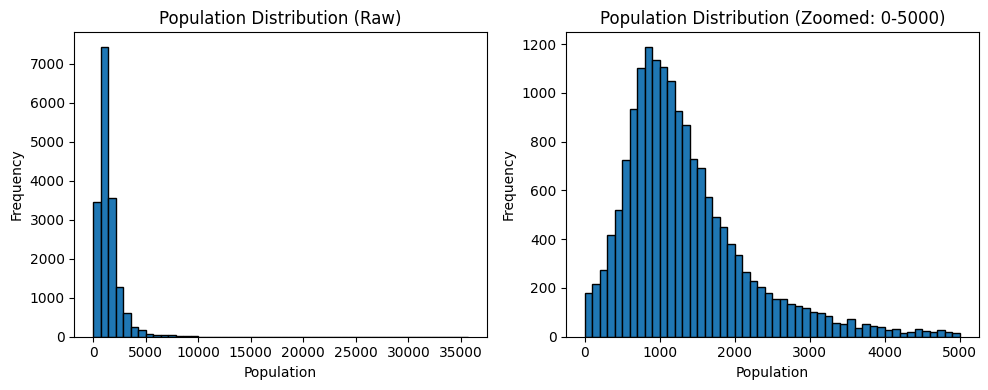

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Quick statistical check
print(training_df['population'].describe())
print("\nMean vs Median:")
print(f"Mean: {training_df['population'].mean():.1f}")
print(f"Median: {training_df['population'].median():.1f}")

# 2. Histogram - see the distribution shape
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(training_df['population'], bins=50, edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution (Raw)')

plt.subplot(1, 2, 2)
plt.hist(training_df['population'], bins=50, edgecolor='black', range=(0, 5000))
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution (Zoomed: 0-5000)')

plt.tight_layout()
plt.show()

Neighborhoods with unusual people per household:
       population  households  people_per_household  median_house_value
10797      6532.0        13.0                 502.5            350000.0
8734       8733.0       105.0                  83.2            154600.0
2065       1275.0        20.0                  63.8            162500.0
11659      1542.0        30.0                  51.4            162500.0
8292       1154.0        28.0                  41.2            500001.0
2508       2886.0        85.0                  34.0            183300.0
2780       2688.0       126.0                  21.3            212500.0
9260        309.0        16.0                  19.3             52500.0
464        5176.0       275.0                  18.8            153300.0
5445        925.0        50.0                  18.5            135700.0


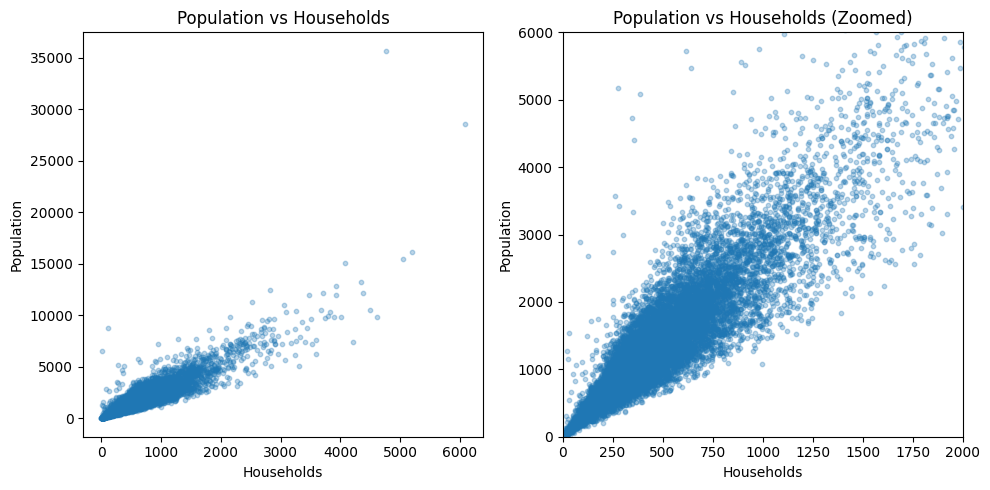

In [26]:
# Check if population/households ratio is reasonable
training_df['people_per_household'] = training_df['population'] / training_df['households']

# Look at extreme cases
print("Neighborhoods with unusual people per household:")
print(training_df.nlargest(10, 'people_per_household')[
    ['population', 'households', 'people_per_household', 'median_house_value']
])

# Scatter plot: population vs households
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(training_df['households'], training_df['population'], alpha=0.3, s=10)
plt.xlabel('Households')
plt.ylabel('Population')
plt.title('Population vs Households')

plt.subplot(1, 2, 2)
plt.scatter(training_df['households'], training_df['population'], alpha=0.3, s=10)
plt.xlim(0, 2000)
plt.ylim(0, 6000)
plt.xlabel('Households')
plt.ylabel('Population')
plt.title('Population vs Households (Zoomed)')

plt.tight_layout()
plt.show()

In [27]:
# Find the extreme cases
extreme = training_df[training_df['people_per_household'] > 5]
print(f"Found {len(extreme)} neighborhoods with >5 people per household:\n")
print(extreme[['population', 'households', 'people_per_household', 
               'median_income', 'median_house_value']])

Found 277 neighborhoods with >5 people per household:

       population  households  people_per_household  median_income  \
24         3424.0       283.0                  12.1            1.6   
43          822.0        64.0                  12.8            3.4   
142        1334.0       260.0                   5.1            2.3   
275         918.0       152.0                   6.0            6.2   
464        5176.0       275.0                  18.8            2.6   
...           ...         ...                   ...            ...   
16073      1786.0       301.0                   5.9            3.1   
16309        13.0         1.0                  13.0           15.0   
16597        94.0        10.0                   9.4            1.4   
16906       780.0       130.0                   6.0            0.8   
16949      3546.0       585.0                   6.1            2.3   

       median_house_value  
24                53500.0  
43               142500.0  
142               61

=== NORMAL NEIGHBORHOODS (≤5 people/household) ===
Count: 16723
Median house value: $181,400
Mean income: $38,960

=== CROWDED NEIGHBORHOODS (>5 people/household) ===
Count: 277
Median house value: $150,000
Mean income: $31,335


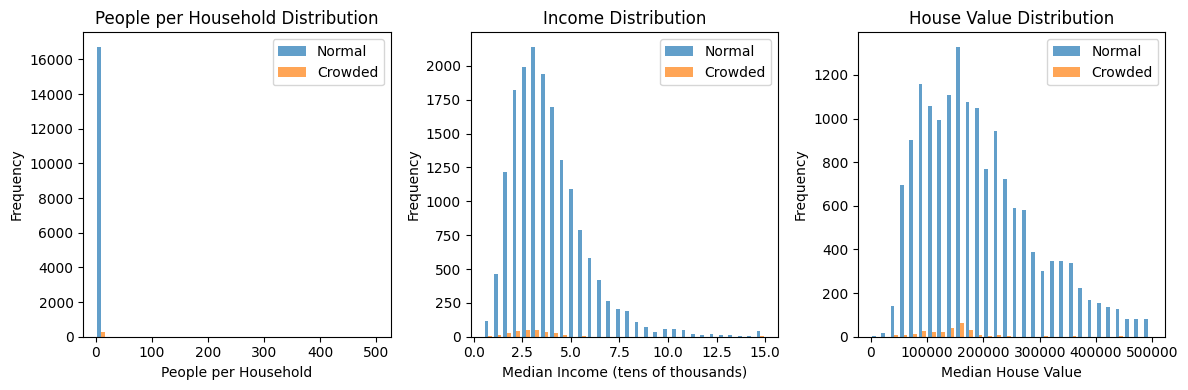

In [28]:
# Compare distributions
import numpy as np

normal = training_df[training_df['people_per_household'] <= 5]
crowded = training_df[training_df['people_per_household'] > 5]

print("=== NORMAL NEIGHBORHOODS (≤5 people/household) ===")
print(f"Count: {len(normal)}")
print(f"Median house value: ${normal['median_house_value'].median():,.0f}")
print(f"Mean income: ${normal['median_income'].mean() * 10000:,.0f}")

print("\n=== CROWDED NEIGHBORHOODS (>5 people/household) ===")
print(f"Count: {len(crowded)}")
print(f"Median house value: ${crowded['median_house_value'].median():,.0f}")
print(f"Mean income: ${crowded['median_income'].mean() * 10000:,.0f}")

# Visualize the difference
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist([normal['people_per_household'], crowded['people_per_household']], 
         bins=30, label=['Normal', 'Crowded'], alpha=0.7)
plt.xlabel('People per Household')
plt.ylabel('Frequency')
plt.legend()
plt.title('People per Household Distribution')

plt.subplot(1, 3, 2)
plt.hist([normal['median_income'], crowded['median_income']], 
         bins=30, label=['Normal', 'Crowded'], alpha=0.7)
plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
plt.hist([normal['median_house_value'], crowded['median_house_value']], 
         bins=30, label=['Normal', 'Crowded'], alpha=0.7, range=(0, 500000))
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('House Value Distribution')

plt.tight_layout()
plt.show()

In [29]:
# Check the most extreme cases
very_crowded = training_df[training_df['people_per_household'] > 10]
print(f"Extremely crowded (>10 people/household): {len(very_crowded)} neighborhoods\n")
print(very_crowded[['population', 'households', 'people_per_household', 
                     'median_income', 'median_house_value']].sort_values('people_per_household', ascending=False))

# Check the statistical impact
print(f"\n% of dataset: {len(very_crowded) / len(training_df) * 100:.2f}%")

Extremely crowded (>10 people/household): 26 neighborhoods

       population  households  people_per_household  median_income  \
10797      6532.0        13.0                 502.5            4.3   
8734       8733.0       105.0                  83.2            4.2   
2065       1275.0        20.0                  63.8            1.6   
11659      1542.0        30.0                  51.4            5.7   
8292       1154.0        28.0                  41.2            9.3   
...           ...         ...                   ...            ...   
2781       1492.0       123.0                  12.1            2.3   
24         3424.0       283.0                  12.1            1.6   
12974      1107.0        98.0                  11.3            3.4   
1391       2745.0       250.0                  11.0            3.5   
13355       132.0        13.0                  10.2            3.4   

       median_house_value  
10797            350000.0  
8734             154600.0  
2065           

Your Action Plan

Based on this analysis, I'd recommend:
Option 1 (Conservative): Keep all data as-is

The pattern is real and meaningful
Only 1.6% of data, won't dominate the model

Option 2 (Cautious): Cap extreme outliers

Keep 5-10 people/household (real overcrowding)
Remove >10 people/household (possible errors)
This removes maybe 20-30 rows, keeps the signal

What would you do and why? This is the kind of judgment call real data scientists make daily. There's no perfect answer - it depends on your goals.

Probably this option. 
* Remove >10 people/household (possible errors)Extremely crowded (>10 people/household): 26 neighborhoods

       population  households  people_per_household  median_income  \
10797      6532.0        13.0                 502.5            4.3   
8734       8733.0       105.0                  83.2            4.2   
2065       1275.0        20.0                  63.8            1.6   
11659      1542.0        30.0                  51.4            5.7   
8292       1154.0        28.0                  41.2            9.3   
...           ...         ...                   ...            ...   
2781       1492.0       123.0                  12.1            2.3   
24         3424.0       283.0                  12.1            1.6   
12974      1107.0        98.0                  11.3            3.4   
1391       2745.0       250.0                  11.0            3.5   
13355       132.0        13.0                  10.2            3.4   
       median_house_value  
10797            350000.0  
8734             154600.0  
2065             162500.0  
11659            162500.0  
8292             500001.0  
...                   ...  
2781             125000.0  
24                53500.0  
12974            137500.0  
1391              67500.0  
13355             67500.0  
[26 rows x 5 columns]
% of dataset: 0.15%Show more



Excellent decision! You're thinking like a data scientist. Let's break down why this is the right call:
Why Remove These 26 Rows?

Look at the top cases:
Row 10797: 6,532 people in 13 households = 502 people/household (!!)
Row 8734:  8,733 people in 105 households = 83 people/household
Row 2065:  1,275 people in 20 households = 64 people/household

These aren't houses. They're likely:

Data entry errors (decimal point mistakes?)
Institutional buildings (prisons, hospitals) miscoded as residential
Census blocks that got corrupted

At 502 people per household, that's not overcrowding - that's physically impossible for residential housing.

The Math Check

Only 0.15% of your data = minimal loss
Removes noise without removing the real pattern (5-10 people/household stays)
Improves model quality by removing confusing outliers

Original dataset: 17000 rows
People per household - Min: 0.7, Max: 502.5

Cleaned dataset: 16974 rows
Removed: 26 rows (0.15%)
People per household - Min: 0.7, Max: 10.0


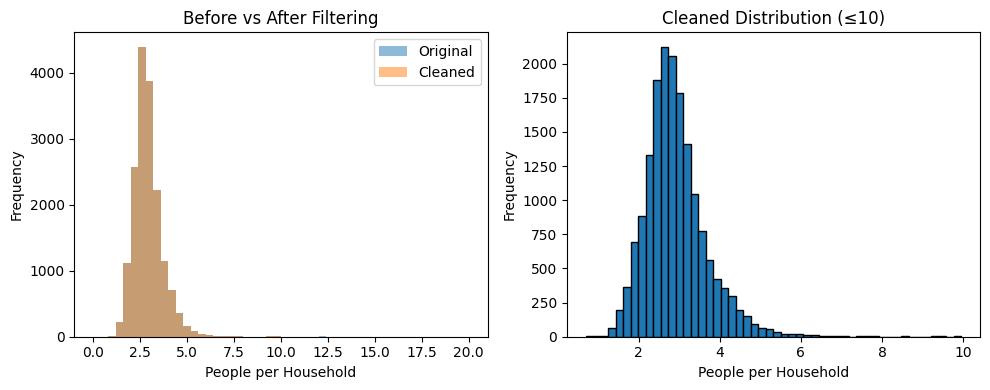

In [30]:
# Before filtering
print(f"Original dataset: {len(training_df)} rows")
print(f"People per household - Min: {training_df['people_per_household'].min():.1f}, Max: {training_df['people_per_household'].max():.1f}")

# Filter out extreme outliers
training_df_clean = training_df[training_df['people_per_household'] <= 10].copy()

# After filtering
print(f"\nCleaned dataset: {len(training_df_clean)} rows")
print(f"Removed: {len(training_df) - len(training_df_clean)} rows ({(len(training_df) - len(training_df_clean))/len(training_df)*100:.2f}%)")
print(f"People per household - Min: {training_df_clean['people_per_household'].min():.1f}, Max: {training_df_clean['people_per_household'].max():.1f}")

# Verify the distributions still look good
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(training_df['people_per_household'], bins=50, alpha=0.5, label='Original', range=(0, 20))
plt.hist(training_df_clean['people_per_household'], bins=50, alpha=0.5, label='Cleaned', range=(0, 20))
plt.xlabel('People per Household')
plt.ylabel('Frequency')
plt.legend()
plt.title('Before vs After Filtering')

plt.subplot(1, 2, 2)
plt.hist(training_df_clean['people_per_household'], bins=50, edgecolor='black')
plt.xlabel('People per Household')
plt.ylabel('Frequency')
plt.title('Cleaned Distribution (≤10)')

plt.tight_layout()
plt.show()

# Save the cleaned data if you want
# training_df_clean.to_csv('california_housing_cleaned.csv', index=False)

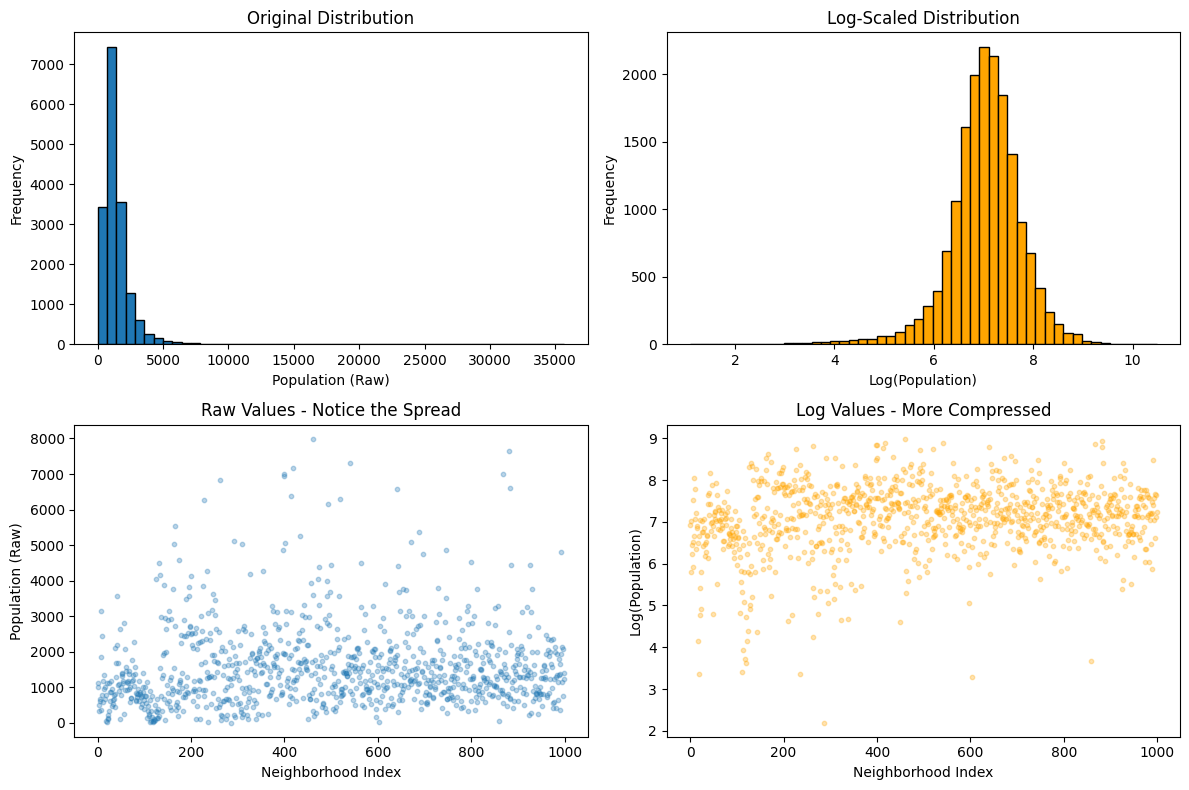

Raw values - extreme range:
  Min: 3, Max: 35682
  Range: 35679
  Ratio (max/min): 11894.0x

Log-scaled values - compressed range:
  Min: 1.10, Max: 10.48
  Range: 9.38
  Ratio (max/min): 11894.0x


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Create a feature with power law distribution
sample = training_df_clean['population'].copy()

# Apply log scaling
sample_log = np.log(sample)

# Compare distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Raw distribution
axes[0, 0].hist(sample, bins=50, edgecolor='black')
axes[0, 0].set_xlabel('Population (Raw)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Original Distribution')

# Log-scaled distribution
axes[0, 1].hist(sample_log, bins=50, edgecolor='black', color='orange')
axes[0, 1].set_xlabel('Log(Population)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Log-Scaled Distribution')

# Raw values over index (first 1000 rows)
axes[1, 0].scatter(range(1000), sample[:1000], alpha=0.3, s=10)
axes[1, 0].set_xlabel('Neighborhood Index')
axes[1, 0].set_ylabel('Population (Raw)')
axes[1, 0].set_title('Raw Values - Notice the Spread')

# Log values over index
axes[1, 1].scatter(range(1000), sample_log[:1000], alpha=0.3, s=10, color='orange')
axes[1, 1].set_xlabel('Neighborhood Index')
axes[1, 1].set_ylabel('Log(Population)')
axes[1, 1].set_title('Log Values - More Compressed')

plt.tight_layout()
plt.show()

# Show the effect numerically
print("Raw values - extreme range:")
print(f"  Min: {sample.min():.0f}, Max: {sample.max():.0f}")
print(f"  Range: {sample.max() - sample.min():.0f}")
print(f"  Ratio (max/min): {sample.max() / sample.min():.1f}x")

print("\nLog-scaled values - compressed range:")
print(f"  Min: {sample_log.min():.2f}, Max: {sample_log.max():.2f}")
print(f"  Range: {sample_log.max() - sample_log.min():.2f}")
print(f"  Ratio (max/min): {np.exp(sample_log.max()) / np.exp(sample_log.min()):.1f}x")
